In [1]:
from collections import defaultdict
from glob import glob

import numpy as np
import pandas as pd
import patsy
import re

import seaborn as sns

import matplotlib.pyplot as plt

% matplotlib inline

NAN = float('nan')
INPUT_PATH = "../data/2/{}_{}.csv"
OUTPUT_PATH = "data/3_c/{}.csv"

In [5]:
seasons = "2014-2017"
RB_df = pd.read_csv(INPUT_PATH.format("RB", seasons))
TE_df = pd.read_csv(INPUT_PATH.format("TE", seasons))
WR_df = pd.read_csv(INPUT_PATH.format("WR", seasons))

* **–1**. A **perfect negative** linear relationship
* **–0.70**. A **strong negative** linear relationship
* **–0.50**. A **moderate negative** relationship
* **–0.30**. A **weak negative** linear relationship
* **0. No linear relationship**
* **+0.30**. A **weak positive** linear relationship
* **+0.50**. A **moderate positive** relationship
* **+0.70**. A **strong positive** linear relationship
* **+1**. A **perfect positive** linear relationship


# Rushing Stats

In [3]:
def show_corr(df):
    df = df.loc[:,('next_fp', 'fp', 'rush_td', 'rush_att', 'rush_yd')]
    print(df.corr()['next_fp'].sort_values(ascending=False))
    print(df.corr()['fp'].sort_values(ascending=False))
    sns.heatmap(df.corr(), cmap="seismic", annot=True);

## RB

next_fp     1.000000
rush_att    0.289162
fp          0.261144
rush_yd     0.260832
rush_td     0.143972
Name: next_fp, dtype: float64
fp          1.000000
rush_td     0.719850
rush_yd     0.688655
rush_att    0.542414
next_fp     0.261144
Name: fp, dtype: float64


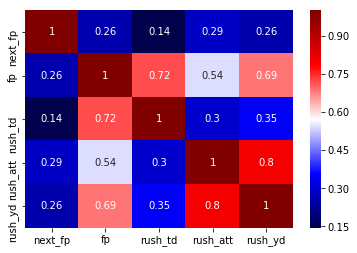

In [6]:
show_corr(RB_df)

## WR

next_fp     1.000000
fp          0.088050
rush_att   -0.000004
rush_yd    -0.022465
rush_td    -0.029397
Name: next_fp, dtype: float64
fp          1.000000
next_fp     0.088050
rush_td     0.053896
rush_yd     0.034674
rush_att    0.016544
Name: fp, dtype: float64


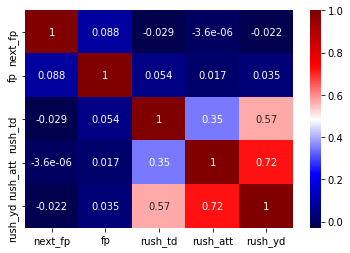

In [7]:
show_corr(WR_df)

## TE

next_fp     1.000000
fp          0.201323
rush_td          NaN
rush_att         NaN
rush_yd          NaN
Name: next_fp, dtype: float64
fp          1.000000
next_fp     0.201323
rush_td          NaN
rush_att         NaN
rush_yd          NaN
Name: fp, dtype: float64


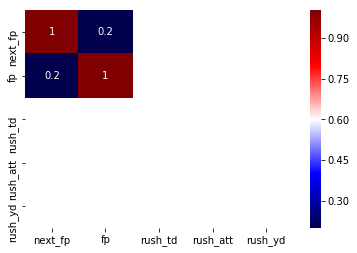

In [8]:
TE_df['rush_yd'] = 0
TE_df['rush_td'] = 0
TE_df['rush_att'] = 0
show_corr(TE_df)

## Combined

next_fp     1.000000
fp          0.193237
rush_yd     0.111434
rush_att    0.110564
rush_td     0.081851
Name: next_fp, dtype: float64
fp          1.000000
rush_td     0.499587
rush_yd     0.355765
rush_att    0.241263
next_fp     0.193237
Name: fp, dtype: float64


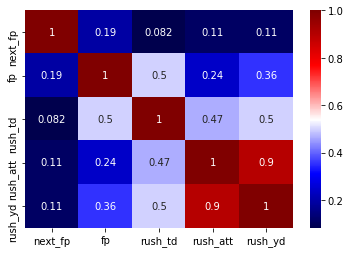

In [9]:
combined = RB_df[['next_fp', 'fp', 'rush_yd', 'rush_att', 'rush_td']].append(
    WR_df[['next_fp', 'fp', 'rush_yd', 'rush_att', 'rush_td']])
show_corr(combined)

* Rush attempts and Rush yds probably collinear.
* Rush attempts seem to be important for running backs, but nonexistent for the others. 